In [ ]:
import os 
os.chdir("/content/sample_data/deep learning")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
my_data=pd.read_csv("/content/sample_data/deep learning/deep_learning.csv")

In [ ]:
my_data.head()

,Number of times pregnant,glucose concentration,blood pressure,Triceps thickness,insulin level,Body mass index,Diabetes pedigree function,Age,Diabetes result
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
my_data.columns

Index(['Number of times pregnant', 'glucose concentration', 'blood pressure',
       'Triceps thickness', 'insulin level', 'Body mass index',
       'Diabetes pedigree function', 'Age', 'Diabetes result'],
      dtype='object')

In [ ]:
my_data['Diabetes result'].value_counts()

0    500
1    268
Name: Diabetes result, dtype: int64

In [ ]:
my_data.shape

(768, 9)

In [ ]:
my_data.describe()

,Number of times pregnant,glucose concentration,blood pressure,Triceps thickness,insulin level,Body mass index,Diabetes pedigree function,Age,Diabetes result
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Number of times pregnant    768 non-null    int64  
 1   glucose concentration       768 non-null    int64  
 2   blood pressure              768 non-null    int64  
 3   Triceps thickness           768 non-null    int64  
 4   insulin level               768 non-null    int64  
 5   Body mass index             768 non-null    float64
 6   Diabetes pedigree function  768 non-null    float64
 7   Age                         768 non-null    int64  
 8   Diabetes result             768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


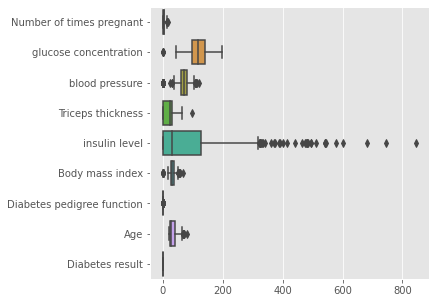

In [ ]:
plt.figure(figsize=(5,5)) 
plt.style.use('ggplot')                             #we have outliers in  columns
sns.boxplot(data = my_data,width=.8,orient="h")

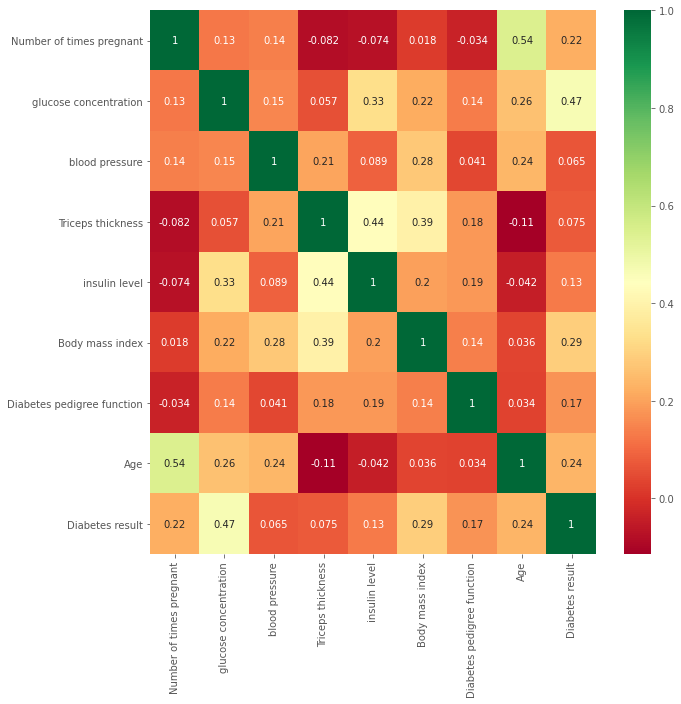

In [ ]:
plt.figure(figsize=(10,10)) 
sns.heatmap(my_data.corr(), annot=True,cmap ='RdYlGn')
plt.show()  

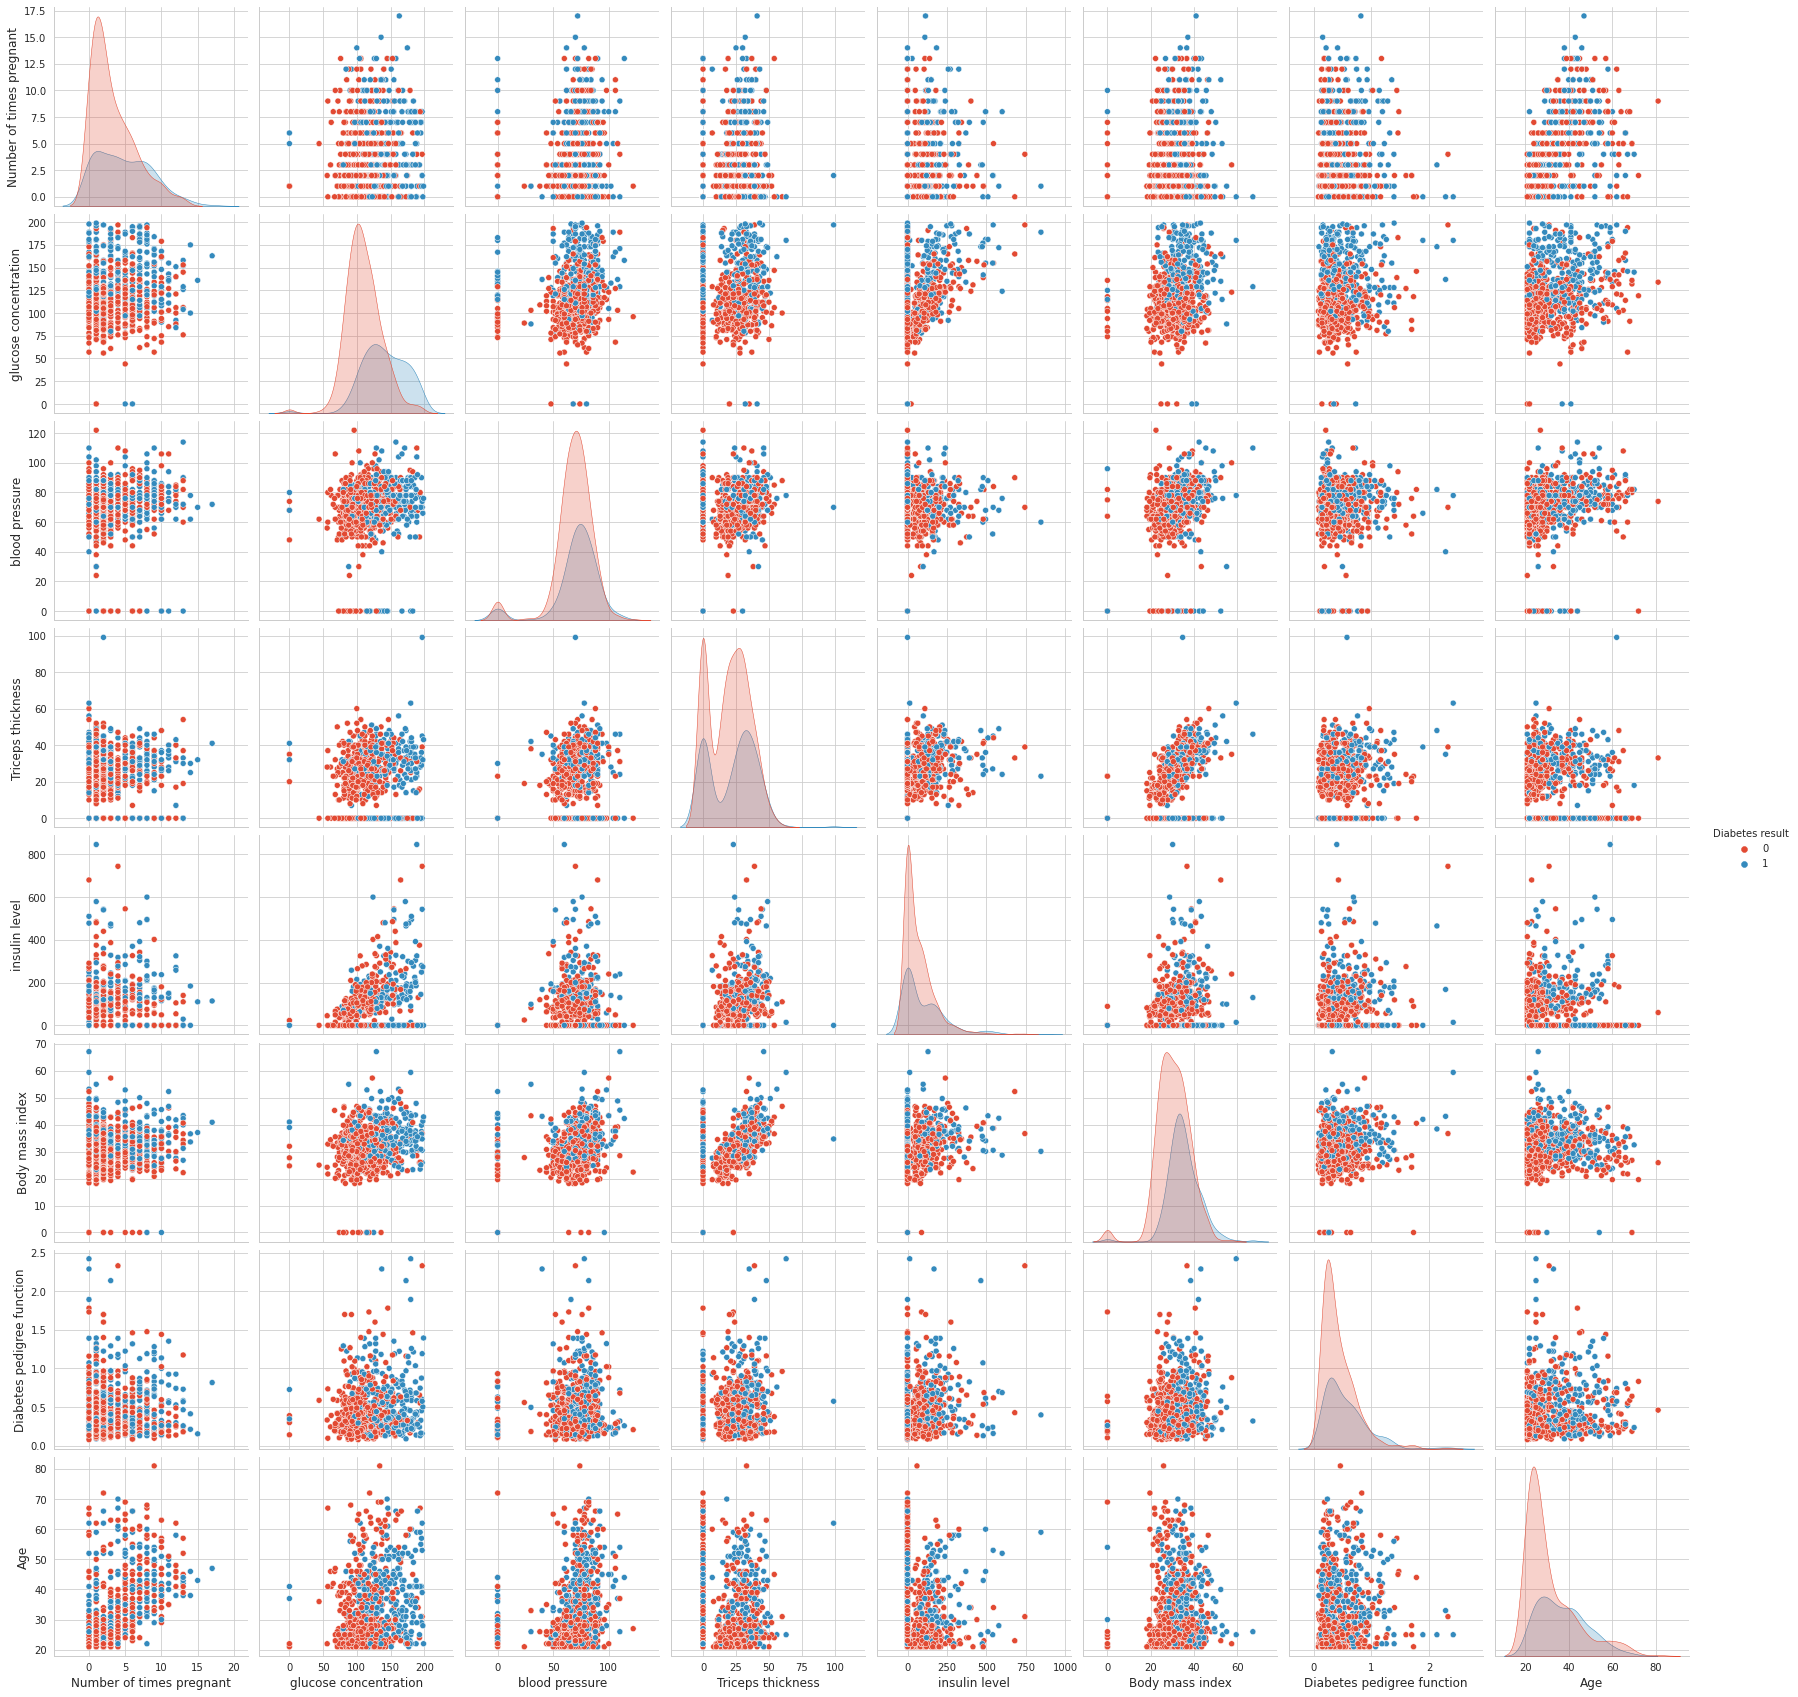

In [ ]:
sns.set_style("whitegrid");
sns.pairplot(my_data, hue="Diabetes result", height=3);
plt.show()

In [ ]:
my_data.isna().sum()

Number of times pregnant      0
glucose concentration         0
blood pressure                0
Triceps thickness             0
insulin level                 0
Body mass index               0
Diabetes pedigree function    0
Age                           0
Diabetes result               0
dtype: int64

In [ ]:
my_data.quantile(.25, axis = 0)

Number of times pregnant       1.00000
glucose concentration         99.00000
blood pressure                62.00000
Triceps thickness              0.00000
insulin level                  0.00000
Body mass index               27.30000
Diabetes pedigree function     0.24375
Age                           24.00000
Diabetes result                0.00000
Name: 0.25, dtype: float64

In [ ]:
my_data.quantile(.75, axis = 0)-my_data.quantile(.25, axis = 0)

Number of times pregnant        5.0000
glucose concentration          41.2500
blood pressure                 18.0000
Triceps thickness              32.0000
insulin level                 127.2500
Body mass index                 9.3000
Diabetes pedigree function      0.3825
Age                            17.0000
Diabetes result                 1.0000
dtype: float64

In [ ]:
my_data["Number of times pregnant"] = np.where(my_data["Number of times pregnant"] >13.5,13.5,my_data["Number of times pregnant"])

In [ ]:
my_data["glucose concentration"] = np.where(my_data["glucose concentration"] <37.125,37.125,my_data["glucose concentration"])

In [ ]:
my_data["blood pressure"] = np.where(my_data["blood pressure"] <35,35,my_data["blood pressure"])

In [ ]:
my_data["blood pressure"] = np.where(my_data["blood pressure"] >107,107,my_data["blood pressure"])

In [ ]:
my_data["Triceps thickness"] = np.where(my_data["Triceps thickness"] >80,80,my_data["Triceps thickness"])

In [ ]:
my_data["insulin level"] = np.where(my_data["insulin level"] >318.125,318.125,my_data["insulin level"])

In [ ]:
my_data["Body mass index"] = np.where(my_data["Body mass index"] >64.2,64.2,my_data["Body mass index"])

In [ ]:
my_data["Body mass index"] = np.where(my_data["Body mass index"] <13.05,13.05,my_data["Body mass index"])

In [ ]:
my_data["Diabetes pedigree function"] = np.where(my_data["Diabetes pedigree function"] >1.321875,1.321875,my_data["Diabetes pedigree function"])

In [ ]:
my_data["Age"]=np.where(my_data["Age"]>78.5,78.5,my_data["Age"])

Text(0, 0.5, 'Diabetes result')

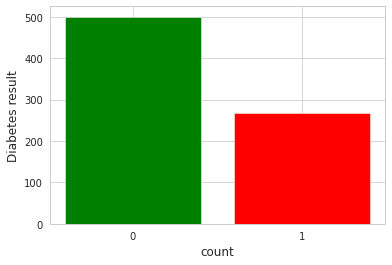

In [ ]:
height = [500,268]
bars = ('0','1')
plt.bar(bars, height,color=("green","red"))
plt.xlabel("count")
plt.ylabel("Diabetes result")

In [ ]:
from sklearn.utils import resample

In [ ]:
df_majority=my_data[my_data["Diabetes result"] == 0]
df_minority=my_data[my_data["Diabetes result"] == 1]

In [ ]:
df_minority_upsampled=resample(df_minority,replace=True,n_samples=500,random_state=123)
my_data_upsampld=pd.concat([df_majority,df_minority_upsampled])

In [ ]:
my_data_upsampld.shape

(1000, 9)

In [ ]:
my_data_upsampld["Diabetes result"].value_counts()

1    500
0    500
Name: Diabetes result, dtype: int64

Text(0, 0.5, 'Diabetes result')

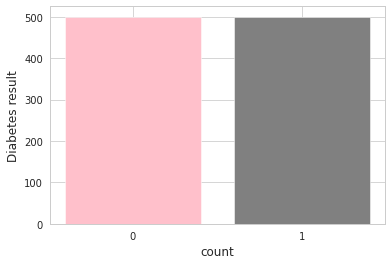

In [ ]:
height = [500,500]
bars = ('0','1')
plt.bar(bars, height,color=("pink","grey"))
plt.xlabel("count")
plt.ylabel("Diabetes result")

In [ ]:
X=my_data_upsampld.drop("Diabetes result",axis=1)

In [ ]:
Y=my_data_upsampld["Diabetes result"]


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
def create_my_model():
    #defining my model
    mymodel = Sequential()
    mymodel.add(Dense(8, input_dim=8, activation='relu'))
    mymodel.add(Dense(4,activation="relu"))
    mymodel.add(Dense(1, activation='sigmoid'))
    
    # Compile the model
    mymodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return mymodel

In [ ]:
model = KerasClassifier(build_fn=create_my_model)

In [ ]:
model.fit(X_train, y_train, epochs=30, batch_size=10)

Epoch 1/30
80/80 [==============================] - 1s 1ms/step - loss: 0.7972 - accuracy: 0.5863
Epoch 2/30
80/80 [==============================] - 0s 1ms/step - loss: 0.7222 - accuracy: 0.5707
Epoch 3/30
80/80 [==============================] - 0s 1ms/step - loss: 0.6982 - accuracy: 0.5876
Epoch 4/30
80/80 [==============================] - 0s 1ms/step - loss: 0.6751 - accuracy: 0.6294
Epoch 5/30
80/80 [==============================] - 0s 1ms/step - loss: 0.6500 - accuracy: 0.6898
Epoch 6/30
80/80 [==============================] - 0s 1ms/step - loss: 0.6315 - accuracy: 0.7102
Epoch 7/30
80/80 [==============================] - 0s 1ms/step - loss: 0.6279 - accuracy: 0.7040
Epoch 8/30
80/80 [==============================] - 0s 1ms/step - loss: 0.6178 - accuracy: 0.7177
Epoch 9/30
80/80 [==============================] - 0s 1ms/step - loss: 0.6038 - accuracy: 0.7285
Epoch 10/30
80/80 [==============================] - 0s 1ms/step - loss: 0.5887 - accuracy: 0.7225
Epoch 11/30
80/80 [

In [ ]:
y_pred = model.predict(X_test)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[67 31]
 [18 84]]


In [ ]:
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_pred,y_test)
print(score)


0.755


In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.68      0.79      0.73        85
           1       0.82      0.73      0.77       115

    accuracy                           0.76       200
   macro avg       0.75      0.76      0.75       200
weighted avg       0.76      0.76      0.76       200



In [ ]:
##lets do hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
batchSize = [10, 20, 40, 60, 80, 100]
epochs = [10, 30, 50,100,200]


In [ ]:
parameter_grid = dict(batch_size=batchSize, epochs=epochs)
mygrid = GridSearchCV(estimator=model, param_grid=parameter_grid, n_jobs=-1, cv=3)
grid_result = mygrid.fit(X_train, y_train)

Epoch 1/200
20/20 [==============================] - 0s 1ms/step - loss: 0.7188 - accuracy: 0.5134
Epoch 2/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6862 - accuracy: 0.5747
Epoch 3/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6693 - accuracy: 0.6036
Epoch 4/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6614 - accuracy: 0.6220
Epoch 5/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6486 - accuracy: 0.6327
Epoch 6/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6154 - accuracy: 0.6621
Epoch 7/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6044 - accuracy: 0.6865
Epoch 8/200
20/20 [==============================] - 0s 1ms/step - loss: 0.5983 - accuracy: 0.6883
Epoch 9/200
20/20 [==============================] - 0s 1ms/step - loss: 0.5790 - accuracy: 0.7027
Epoch 10/200
20/20 [==============================] - 0s 1ms/step - loss: 0.5672 - accuracy: 0.7104
Epoch 11/

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.783795 using {'batch_size': 40, 'epochs': 200}


In [ ]:
# while saving keras model i am getting error 
# for sklearn kerasclassifer this is the way, to solve sorry for this

In [ ]:
import pickle      

In [ ]:
with open('pickled_data_file.pkl', 'wb') as fid:
     pickle.dump(model, fid)

TypeError: ignored